In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (30, 10)
import seaborn as sns

In [6]:
df = pd.read_excel("../data/raw/data_OCT20.xlsx")
print(df.shape)

# initial data prep
int_to_str_cols_l = ["accident_id", "vehicle_id", "address_id"]
for col in int_to_str_cols_l:
    df[col] = df[col].astype(str)
df.head()

(445821, 10)


,compensation_status,accident_id,vehicle_id,fd_decision,circumstances,road_signs,road_surface,visibility,road_conditions,address_id
0,VALIDATED_EIF,210,14.0,NG,NaN,NaN,NaN,NaN,NaN,60
1,VALIDATED_EIF,210,13.0,FG,NaN,NaN,NaN,NaN,NaN,60
2,VALIDATED_EIF,216,30.0,NG,NaN,NaN,NaN,NaN,NaN,154
3,VALIDATED_EIF,216,29.0,FG,NaN,NaN,NaN,NaN,NaN,154
4,VALIDATED_EIF,244,47.0,NG,NaN,NaN,NaN,NaN,NaN,227


To do

1. check N of accidents
2. check fd_decision per accident
3. chech N road_signs available
4. check address_id to be in is_road_sign=True
5. statistics N-carsin accident_id
6. check categorical data availability in df
7. check if vehicle appears in more than one accident

Comments:


    > add dates
    > what we do with one vehicle accidents?
    > add mapping for circumstances, road_signs, road_surface, visibility, road_conditions
    

In [7]:
df.compensation_status.value_counts()

VALIDATED_EIF    445821
Name: compensation_status, dtype: int64

In [8]:
df.accident_id.astype(int).describe()

count    445821.000000
mean     159548.027960
std      101037.235959
min         210.000000
25%       72196.000000
50%      146811.000000
75%      242575.000000
max      358814.000000
Name: accident_id, dtype: float64

In [9]:
print(f" available {df.accident_id.nunique()} number of accidents")

 available 175691 number of accidents


### Check number of vehicles in an accident statistics

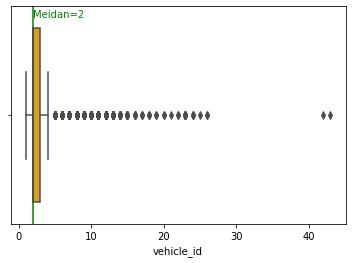

In [6]:
df_temp = df[["accident_id", "vehicle_id"]].groupby("accident_id").count().reset_index()
median_ = int(df_temp.vehicle_id.quantile(0.5))
g = sns.boxplot(data=df_temp, x="vehicle_id", color="orange")
ymin, ymax = g.get_ylim()
g.vlines(x=median_, ymin=ymin, ymax=ymax, color="green")
g.text(x=median_, y=ymax-ymax*0.1, s=f"Meidan={median_}", color="green")
plt.show()

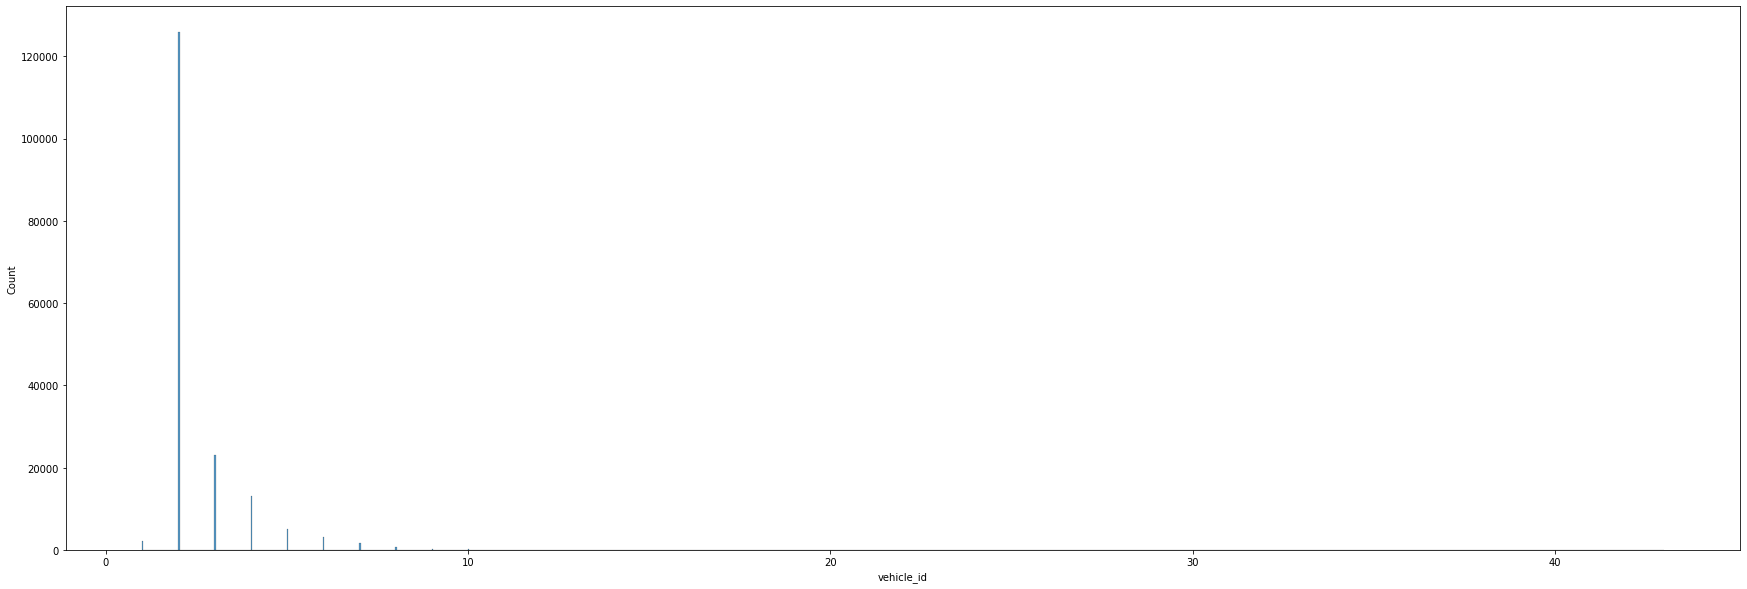

In [142]:
sns.histplot(data=df_temp, x="vehicle_id")
plt.show()

In [141]:
# what we do with accidents with one vehicle only?
df_temp.vehicle_id.value_counts()

2     125870
3      23103
4      13180
5       5191
6       3086
1       2128
7       1579
8        805
9        337
10       209
11        70
12        41
13        26
14        15
15        12
23        11
16         7
17         3
18         3
24         3
19         2
26         2
20         2
22         2
21         1
43         1
42         1
25         1
Name: vehicle_id, dtype: int64

### Check fd_decision statistics 

In [122]:
del df_temp
df_temp = df[["accident_id", 
              "vehicle_id", 
              "fd_decision"]].groupby(["accident_id"]).agg({"vehicle_id": ["nunique"],
                                                            "fd_decision": ["nunique"]}).reset_index().sort_values(by=('vehicle_id', 'nunique'))
df_temp.columns = ["".join(col).strip().replace("nunique", "") for col in df_temp.columns.values]
df_temp

,accident_id,vehicle_id,fd_decision
11275,118657,1,1
13652,123241,1,1
45966,179855,1,1
88544,265934,1,1
10023,116764,1,1
...,...,...,...
18093,130436,9,2
166359,84142,9,2
128017,338125,10,2
159772,72694,12,2


In [124]:
valid_acc_id_by_fd = df_temp[df_temp.fd_decision==2].accident_id.unique()
print(f"we have {len(valid_acc_id_by_fd)}/{df.accident_id.nunique()} number of valid fd_decision accidents")

we have 168859/175691 number of valid fd_decision accidents


In [125]:
print(f"we have {len(df_temp[(df_temp.vehicle_id==1) & (df_temp.fd_decision==1)])} number of accidents with 1 vehicle and 1 fd_decision")
print(f"we have {len(df_temp[df_temp.fd_decision>2])} number of accidents with more than 2 fd_decisions")

we have 2595 number of accidents with 1 vehicle and 1 fd_decision
we have 0 number of accidents with more than 2 fd_decisions


#### !Scenario: there are >2 vehicles in an accident, it is acceptable that more than one is faulty?

### Check if we can fill the road signs

In [134]:
# check if we can fill road_signs
# del df_temp
df_road_sign_address = df[~pd.isna(df.road_signs)][["road_signs", "address_id"]]
road_sign_address_dict = dict(zip(df_road_sign_address.address_id, df_road_sign_address.road_signs))

df_temp = df[["accident_id", "vehicle_id", "road_signs", "address_id"]].copy()
df_temp["road_sign_fil"] = df_temp.address_id.map(road_sign_address_dict)

df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445821 entries, 0 to 445820
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   accident_id    445821 non-null  object 
 1   vehicle_id     445821 non-null  object 
 2   road_signs     747 non-null     float64
 3   address_id     445821 non-null  object 
 4   road_sign_fil  1043 non-null    float64
dtypes: float64(2), object(3)
memory usage: 17.0+ MB


### Check circumstances

In [144]:
df.head()

,compensation_status,accident_id,vehicle_id,fd_decision,circumstances,road_signs,road_surface,visibility,road_conditions,address_id
0,VALIDATED_EIF,210,14.0,NG,NaN,NaN,NaN,NaN,NaN,60
1,VALIDATED_EIF,210,13.0,FG,NaN,NaN,NaN,NaN,NaN,60
2,VALIDATED_EIF,216,30.0,NG,NaN,NaN,NaN,NaN,NaN,154
3,VALIDATED_EIF,216,29.0,FG,NaN,NaN,NaN,NaN,NaN,154
4,VALIDATED_EIF,244,47.0,NG,NaN,NaN,NaN,NaN,NaN,227


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445821 entries, 0 to 445820
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   compensation_status  445821 non-null  object 
 1   accident_id          445821 non-null  object 
 2   vehicle_id           445821 non-null  object 
 3   fd_decision          445821 non-null  object 
 4   circumstances        143718 non-null  float64
 5   road_signs           747 non-null     float64
 6   road_surface         50301 non-null   float64
 7   visibility           50228 non-null   float64
 8   road_conditions      49977 non-null   float64
 9   address_id           445821 non-null  object 
dtypes: float64(5), object(5)
memory usage: 34.0+ MB


In [162]:
print(f"Only {100*np.round(df[~pd.isna(df.circumstances)].accident_id.nunique()/df.accident_id.nunique(), 2)}% accidents are with known circumstances")
print(f"Only {100*np.round(df[~pd.isna(df.road_surface)].accident_id.nunique()/df.accident_id.nunique(), 2)}% accidents are with known road surface")
print(f"Only {100*np.round(df[~pd.isna(df.visibility)].accident_id.nunique()/df.accident_id.nunique(), 2)}% accidents are with known visibility")
print(f"Only {100*np.round(df[~pd.isna(df.road_conditions)].accident_id.nunique()/df.accident_id.nunique(), 2)}% accidents are with known road conditions")

Only 23.0% accidents are with known circumstances
Only 11.0% accidents are with known road surface
Only 11.0% accidents are with known visibility
Only 11.0% accidents are with known road conditions


In [3]:
100*(4217/175691)

2.4002367793455557

In [164]:
list_available_data = [
    df[~pd.isna(df.circumstances)].accident_id.unique(), 
    df[~pd.isna(df.road_conditions)].accident_id.unique(),
    df[~pd.isna(df.visibility)].accident_id.unique(),
    df[~pd.isna(df.road_surface)].accident_id.unique()
]
valid_data_accidents = set.intersection(*map(set,list_available_data))
print(f"We have {len(valid_data_accidents)} number of accidents with known circumstances, road_surface, visiblity and road_conditions")

We have 4217 number of accidents with known circumstances, road_surface, visiblity and road_conditions


In [166]:
df_full = df[df.accident_id.isin(valid_data_accidents)]
df_full

,compensation_status,accident_id,vehicle_id,fd_decision,circumstances,road_signs,road_surface,visibility,road_conditions,address_id
19709,VALIDATED_EIF,16141,26245.0,NG,NaN,NaN,1.0,2.0,1.0,141147
19710,VALIDATED_EIF,16141,26244.0,FG,2.0,NaN,1.0,2.0,1.0,141147
19711,VALIDATED_EIF,16141,26244.0,FG,12.0,NaN,1.0,2.0,1.0,141147
19712,VALIDATED_EIF,16141,26244.0,FG,35.0,NaN,1.0,2.0,1.0,141147
19779,VALIDATED_EIF,16169,26324.0,NG,2.0,NaN,1.0,1.0,2.0,141548
...,...,...,...,...,...,...,...,...,...,...
284471,VALIDATED_EIF,188892,566531.0,NG,NaN,NaN,1.0,1.0,1.0,1968163
284472,VALIDATED_EIF,188892,566529.0,FG,9.0,NaN,1.0,1.0,1.0,1968163
284473,VALIDATED_EIF,188892,566529.0,FG,11.0,NaN,1.0,1.0,1.0,1968163
284474,VALIDATED_EIF,188892,566529.0,FG,17.0,NaN,1.0,1.0,1.0,1968163


In [167]:
# Note: Check if these accidents are the most recent ones

In [168]:
df_full.circumstances.value_counts()

2.0     4073
12.0    3977
3.0     1482
11.0     698
15.0     650
19.0     608
30.0     585
25.0     389
4.0      388
20.0     353
31.0     298
23.0     235
16.0     234
35.0     226
21.0     218
29.0     201
13.0     182
14.0     133
17.0     131
8.0      123
33.0      97
5.0       77
9.0       61
18.0      52
38.0      49
26.0      38
36.0      24
7.0       23
27.0      15
22.0      12
28.0      11
6.0       10
37.0       4
Name: circumstances, dtype: int64

In [169]:
df_full.road_surface.value_counts()

1.0    17888
5.0      275
4.0      164
2.0       87
3.0       30
Name: road_surface, dtype: int64

In [170]:
df_full.road_conditions.value_counts()

1.0    15643
2.0     1890
3.0      370
4.0      303
6.0      215
5.0       23
Name: road_conditions, dtype: int64

### Check if vehicle appears in more than one accidents

In [178]:
# del df_temp
df_temp = df[["accident_id", "vehicle_id"]].groupby(["vehicle_id"]).agg({"accident_id": ["nunique"]}).reset_index()
df_temp.columns = ["".join(col).strip().replace("nunique", "") for col in df_temp.columns.values]
df_temp.sort_values(by="accident_id")

,vehicle_id,accident_id
0,10.0,1
240153,630146.0,1
240152,630145.0,1
240151,630144.0,1
240150,630143.0,1
...,...,...
120071,191170.0,1
120070,19117.0,1
120069,191169.0,1
120077,191178.0,1


In [ ]:
df[pd.isna(df.vehicle_id)]

,compensation_status,accident_id,vehicle_id,fd_decision,circumstances,road_signs,road_surface,visibility,road_conditions,address_id


In [186]:
# I find it impossible to have new cars in each accident, that one car never ever appeared in two accidents